# NOTE:
Esse **Jupyter Notebook** terá comentários demasiados pelo os seguintes fatos:
 - Esse é um projeto de estudos;
 - Para quem desejar aprender a partir dos exemplos entenda o que foi feito.

# Pré-Processamento
Primeiro, vamos iniciar nossa análise baixando e referenciando as bibliotecas necessárias; E logo em seguida começar um **Pré-Processamento dos Dados**.

## 01 - Baixando bibliotecas necessárias
Por algum motivo o **MinIO** e o **fastparquet** não estão sendo reconhecidos no nosso **Jupyter Notebook**. Então, vamos baixar eles por aqui para prosseguir com as análises:

In [1]:
!pip3 install minio fastparquet

## 02 - Importando as bibliotecas necessárias
Como em qualquer projeto real aqui nós vamos começar importando as bibliotecas necessárias.

In [2]:
import matplotlib.pyplot as plt
from minio import Minio
import seaborn as sns
import pandas as pd
import datetime
import glob

## 03 - Conectando ao Data Lake com o MinIO
Ok, como nós sabemos o **MinIO** é o orquestrador da nossa aplicação. Sabendo disso, nós vamos criar uma `instância` do **MinIO** que vai representar a conexão com o nosso ***Data Lake***:

In [3]:
client = Minio(
  "localhost:9000",
  access_key="minioadmin",
  secret_key="minioadmin",
  secure=False
)

## 03 - Baixando o Dataset do Data Lake
Agora que nós já criamos uma conexão *(Representação abstrata)* para o nosso ***Data Lake*** com **MinIO** vamos baixar os dados de lá *(Lembrando que nós salvamos esses dados no formato .parquet)*:

In [4]:
client.fget_object(
  "processing", # Landing - Diretório (Bucket) que estamos buscando.
  "employees_dataset.parquet", # Nome do arquivo que vamos baixar.
  "temp_.parquet", # Nome do arquivo temporário para armazenar o que vamos baixar.
)

df = pd.read_parquet("temp_.parquet")

In [5]:
df.head(50)

,department,salary,left,mean_work_last_3_months,number_projects,satisfaction_level,last_evaluation,time_in_company,work_accident
0,sales,low,1.0,266.000000,2.0,38.0,53.0,3.0,0.0
1,sales,medium,1.0,252.000000,5.0,80.0,86.0,6.0,0.0
2,sales,medium,1.0,289.666667,7.0,11.0,88.0,4.0,0.0
3,sales,low,1.0,275.666667,5.0,72.0,87.0,5.0,0.0
4,sales,low,1.0,292.333333,2.0,37.0,52.0,3.0,0.0
5,sales,low,1.0,271.000000,2.0,41.0,50.0,3.0,0.0
6,sales,low,1.0,268.666667,6.0,10.0,77.0,4.0,0.0
7,sales,low,1.0,274.666667,5.0,92.0,85.0,5.0,0.0
8,sales,low,1.0,269.333333,5.0,89.0,100.0,5.0,0.0
9,sales,low,1.0,280.000000,2.0,42.0,53.0,3.0,0.0


## 04 -  Organizando o dataset
Agora nós vamos organizar nosso Dataset, ou seja, vamos definir qual coluna vai está em qual ordem. Só para ficar mais bonitinho:

In [6]:
df = df[
  [
    'department',
    'salary',
    'mean_work_last_3_months',
    'number_projects',
    'satisfaction_level',
    'last_evaluation',
    'time_in_company',
    'work_accident',
    'left'
  ]
]

In [7]:
df.head()

,department,salary,mean_work_last_3_months,number_projects,satisfaction_level,last_evaluation,time_in_company,work_accident,left
0,sales,low,266.000000,2.0,38.0,53.0,3.0,0.0,1.0
1,sales,medium,252.000000,5.0,80.0,86.0,6.0,0.0,1.0
2,sales,medium,289.666667,7.0,11.0,88.0,4.0,0.0,1.0
3,sales,low,275.666667,5.0,72.0,87.0,5.0,0.0,1.0
4,sales,low,292.333333,2.0,37.0,52.0,3.0,0.0,1.0


## 05 - Verificando os registros missing
Bem, agora nós vamos iniciar a faze de Pré-Processamento dos dados. De início vamos ver se temos registros nulos:

In [8]:
df.isnull().sum()

department                 1
salary                     1
mean_work_last_3_months    0
number_projects            1
satisfaction_level         1
last_evaluation            1
time_in_company            1
work_accident              1
left                       1
dtype: int64

**NOTE:**  
Veja que nós só temos um registro nulo.

Uma maneira inteligente de ver qual é esse registro (ou amostra) é utilizar a função **notnull()** do Pandas que exibe apenas os registros (amostras) `não nulas`:

In [9]:
df[df.notnull()]

,department,salary,mean_work_last_3_months,number_projects,satisfaction_level,last_evaluation,time_in_company,work_accident,left
0,sales,low,266.000000,2.0,38.0,53.0,3.0,0.0,1.0
1,sales,medium,252.000000,5.0,80.0,86.0,6.0,0.0,1.0
2,sales,medium,289.666667,7.0,11.0,88.0,4.0,0.0,1.0
3,sales,low,275.666667,5.0,72.0,87.0,5.0,0.0,1.0
4,sales,low,292.333333,2.0,37.0,52.0,3.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
14995,support,low,253.333333,2.0,37.0,48.0,3.0,0.0,1.0
14996,support,low,288.000000,2.0,37.0,53.0,3.0,0.0,1.0
14997,support,low,272.000000,6.0,11.0,96.0,4.0,0.0,1.0
14998,support,low,276.666667,2.0,37.0,52.0,3.0,0.0,1.0


**NOTE:**  
Veja que apenas o último registro está com dados faltantes. E mesmo assim ele ainda tem dados referentes a média de horas trabalhadas. Então, cabe a você pensar se esse dado é crucial ou não para a análise.

Para nosso exemplo, vamos apenas excluir essa amostra, já que só tem ela:

In [10]:
df = df[:14998]

## 06 - Alterando os tipos de dados
Agora nós vamos ver qual o tipo de dado em cada coluna (feature) do nosso Dataset. Para isso vamos primeiro utilizar o atributo **dtypes** do Pandas para fazer essa verificação:

In [11]:
df.dtypes

department                  object
salary                      object
mean_work_last_3_months    float64
number_projects            float64
satisfaction_level         float64
last_evaluation            float64
time_in_company            float64
work_accident              float64
left                       float64
dtype: object

Talvez os dados já estejam da maneira que nós precisamos, mas vou aplicar um Pré-Processamento bem básico só para vocês aprenderem como funciona na prática essa alteração de tipos de dados:

In [12]:
df["number_projects"] = df["number_projects"].astype(int)
df["mean_work_last_3_months"] = df["mean_work_last_3_months"].astype(int)
df["time_in_company"] = df["time_in_company"].astype(int)
df["work_accident"] = df["work_accident"].astype(int)
df["left"] = df["left"].astype(int)

**NOTE:**  
Outra maneira de visualizar os tipos de dados e até ter uma visão mais global do nosso Dataset é utilizar a função **info()**.

Vamos ver na prática como fica mais bonito:

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14998 entries, 0 to 14997
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   department               14998 non-null  object 
 1   salary                   14998 non-null  object 
 2   mean_work_last_3_months  14998 non-null  int64  
 3   number_projects          14998 non-null  int64  
 4   satisfaction_level       14998 non-null  float64
 5   last_evaluation          14998 non-null  float64
 6   time_in_company          14998 non-null  int64  
 7   work_accident            14998 non-null  int64  
 8   left                     14998 non-null  int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 1.0+ MB


In [14]:
df.head()

,department,salary,mean_work_last_3_months,number_projects,satisfaction_level,last_evaluation,time_in_company,work_accident,left
0,sales,low,266,2,38.0,53.0,3,0,1
1,sales,medium,252,5,80.0,86.0,6,0,1
2,sales,medium,289,7,11.0,88.0,4,0,1
3,sales,low,275,5,72.0,87.0,5,0,1
4,sales,low,292,2,37.0,52.0,3,0,1


## 07 - Renomeando atributos (Features)
Bem, agora nós vamos renomear esses atributos (features) para ficar mais parecido com o nosso problema. Ou seja, vamos dar nomes mais limpos:

In [15]:
df = df.rename(columns={
  'satisfaction_level': 'satisfaction',
  'last_evaluation': 'evaluation',
  'number_projects': 'projectCount',
  'mean_work_last_3_months': 'averageMonthlyHours',
  'time_in_company': 'yearsAtCompany',
  'work_accident': 'workAccident',
  'left' : 'turnover'
})

In [16]:
df.head()

,department,salary,averageMonthlyHours,projectCount,satisfaction,evaluation,yearsAtCompany,workAccident,turnover
0,sales,low,266,2,38.0,53.0,3,0,1
1,sales,medium,252,5,80.0,86.0,6,0,1
2,sales,medium,289,7,11.0,88.0,4,0,1
3,sales,low,275,5,72.0,87.0,5,0,1
4,sales,low,292,2,37.0,52.0,3,0,1


# Análise Estatística
Supondo que nós já aplicamos os Pré-Processamentos necessários, chegou a hora de aplicarmos conceitos estatísticos ao nosso conjunto de dados. Ou seja, fazer uma **Análise Estatística**.

## 08 - Verificando o número de registros
Na nossa análise estatística, vamos começar vendo as dimensões do nosso Dataset. Ou seja:
 - Quantos registros (amostras) tem nosso dataset;
 - E quantas colunas (features) tem nosso dataset.

In [17]:
df.shape

(14998, 9)

**NOTE:**  
Vejam que nós temos 14998 registros (amostras) e 9 colunas (features).

## 09 - Calculando a taxa de turnover
Bem, agora chegou a hora de calcular o nosso **turnover**. Ou seja, vamos calcular a *Taxa de Rotatividade* dos Funcionários.

> **Mas como fazer esse cálculo?**

Não sei se vocês e lembram mas nós trocamos o nome da coluna (feature) **left** por **turnover**. Os dados dessa coluna estão binarizados **(Podemos dizer também que estão classificados)**:

 - **0 =** Para quem permanece na empresa;
 - **1 =** Para quem saiu da empresa.

Agora vamos utilizar o método **value_counts()** do *pandas.Series.value_counts* que retorna quantas ocorrências acontecem de cada nessa *coluna (turnover)* em questão:

In [18]:
turnover_rate = df.turnover.value_counts()
turnover_rate

0    11428
1     3570
Name: turnover, dtype: int64

**NOTE:**  
Ok, como nós sabíamos tinhamos *14998 funcionários (amostras)* cadastrados no total. Entre, esses *14998*:

 - Saíram *3570*.
 - E restaram 11428.

> Agora, como eu posso aplicar um cálculo probabilistico para saber quanto porcento (%) dos funcionários saíram e quanto porcento (%) ficou na empresa?

**NOTE:**  
Esse cálculo é muito simples. Basta dividir o o número de funcionários que saíram e o número de funcionários que ficaram, separadamente, pelo número de funcionários totais (amostras totais):

In [19]:
turnover_rate = df.turnover.value_counts() / len(df)
turnover_rate

0    0.761968
1    0.238032
Name: turnover, dtype: float64

Bem, o nosso **turnover** foi o seguinte:
 - **76% dos funcionários permanecem na empresa:**
   - Esses 76% é referente a 76% dos dados totais (100% ou 14998 amostras).
 - **23% dos funcionários saíram da empresa:**
   - Esses 23% é referente a 23% dos dados totais (100% ou 14998 amostras).

## 10 - Overview estátistico dos dados
Agora nós vamos utilizar a função **describe()** para ter uma visão geral das estatísticas de cada coluna (feature):

In [20]:
df.describe()

,averageMonthlyHours,projectCount,satisfaction,evaluation,yearsAtCompany,workAccident,turnover
count,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000
mean,275.687225,3.803174,61.284971,71.611482,3.498266,0.144619,0.238032
std,10.059123,1.232546,24.863103,17.116733,1.460179,0.351728,0.425893
min,232.000000,2.000000,9.000000,36.000000,2.000000,0.000000,0.000000
25%,269.000000,3.000000,44.000000,56.000000,3.000000,0.000000,0.000000
50%,276.000000,4.000000,64.000000,72.000000,3.000000,0.000000,0.000000
75%,282.000000,5.000000,82.000000,87.000000,4.000000,0.000000,0.000000
max,321.000000,7.000000,100.000000,100.000000,10.000000,1.000000,1.000000


## 11 - Overview estatístico por turnover

Ok, agora nós vamos criar um **Overview (visão geral)** por grupos *(0 e 1)*. Mas que tipo de grupos são esses?

 - **0 =** Para quem permaneceu na empresa;
 - **1 =** Para quem saiu da empresa.

**NOTE:**  
Para isso nós vamos utilizar o método **grouby()** do Pandas para `agrupar` os dado. A *coluna (feature)* que nós vamos utilizar é a **"turnover"** que tem a classificação das pessoas que permaneceram na empresa (0) e as que saíram da empresa (1).

In [21]:
turnover_summary = df.groupby('turnover')
turnover_summary.mean()

,averageMonthlyHours,projectCount,satisfaction,evaluation,yearsAtCompany,workAccident
turnover,,,,,,
0,275.734687,3.793490,64.330942,71.582079,3.382394,0.160396
1,275.535294,3.834174,51.534454,71.705602,3.869188,0.094118


O que nós fizemos acima foi o seguinte:

 - Primeiro, `para cada coluna` nós separamos (agrupamos) os dados entre os grupos:
   - **0 =** Que permaneceram na empresa;
   - **1 =** Que saíram da empresa.
 - Segundo, nós salvamos essa separação (agrupamento) na variável **turnover_summary**.
 - Terceiro, por fim, nós exibimos a média de todas as colunas separadas por grupos (0 e 1).

**NOTE:**  
Essa separação que nós fizemos de cada coluna, separando entre os grupos 0 e 1 é o que conhecemos como **agrupamento**.


O conjunto de dados tem:

- 14.998 observações de empregados e 9 atributos.
- A empresa tem uma rotatividade de 23% **(esses 23% foram os 23% que deixaram a empresa)**.
- A satisfação *média* dos empregados é de 64%.
-- A satisfação *média* dos empregados que deixaram a empresa é 51%.

## 12 - Calculando a matriz de correlação
Agora nós vamos verificar o **nível de correlação** entre cada coluna (feature):

,averageMonthlyHours,projectCount,satisfaction,evaluation,yearsAtCompany,workAccident,turnover
averageMonthlyHours,1.000000,-0.009758,0.007879,-0.007301,0.004650,0.011919,-0.008442
projectCount,-0.009758,1.000000,-0.143080,0.349261,0.196767,-0.004781,0.014058
satisfaction,0.007879,-0.143080,1.000000,0.104955,-0.100892,0.058673,-0.219198
evaluation,-0.007301,0.349261,0.104955,1.000000,0.131571,-0.007136,0.003073
yearsAtCompany,0.004650,0.196767,-0.100892,0.131571,1.000000,0.002111,0.141984
workAccident,0.011919,-0.004781,0.058673,-0.007136,0.002111,1.000000,-0.080253
turnover,-0.008442,0.014058,-0.219198,0.003073,0.141984,-0.080253,1.000000


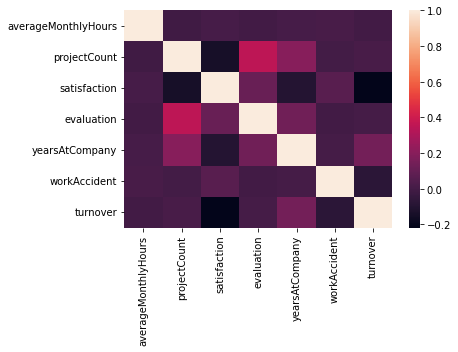

In [22]:
corr = df.corr()
corr = (corr)

sns.heatmap(
  corr,
  xticklabels=corr.columns.values,
  yticklabels=corr.columns.values
)

corr

**NOTE:**  
Vale salientar aqui, que é muito importante você fazer uma análise de mão dupla no gráfico assima:
 - Analisando quão forte é a relação entre as variáveis olhando para o gráfico;
 - E comparando as cores com os números da correlação de saída (Tabela numérica pandas):
   - Quanto mais escuro, maior a correlação - Mais próximo de 2.
   - Quanto mais claro, menor a correlação - Mais próximo de 1.

#  Correlation Matrix & Heatmap
Agora nós vamos analisar o nível de correlação entre as nossas variáveis (numéricas é claro):
***
**Atributos com uma correlação moderada positiva:** 
- projectCount vs evaluation: 0.34
- yearsCompany vs projectCount: 0.19

**Atributos com uma correlação moderada negativa:**
 - satisfaction vs turnover:  -0.21

**Questões:**
- Quais atributos afetam nossa variável alvo (turnover)?
- Existem atributos com alta correlação entre eles?
- Como podemos aprofundar para entender as correlações?

**Resumo:**  
 - Existe uma **correlação positiva** entre os atributos projectCount e Evaluation.
 - Faz sentido que empregados que estão envolvidos em mais projetos, trabalham mais e tem melhor avaliação.
 - Existe uma **correlação negativa** entre os atributos satisfaction e turnover.
 - Podemos assumir que empregados que mais deixam a empresa estão menos satisfeitos.

## 13 - Analisando ás distribuições dos atributos: satisfaction, evaluation e averageMonthlyHours
Agora nós vamos criar gráficos para analisar como estão distribuídos os atributos (features) **satisfaction**, **evaluation** e **averageMonthlyHours**:

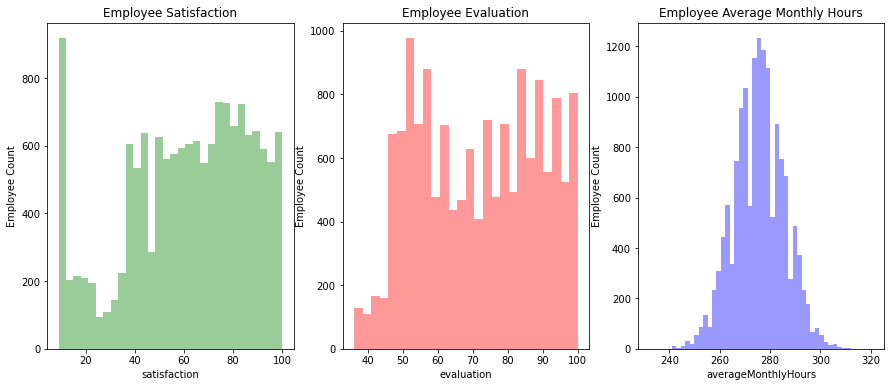

In [24]:
f, axes = plt.subplots(ncols=3, figsize=(15, 6))

# Plota uma distribuição com o atributo "satisfation".
sns.distplot(df.satisfaction, kde=False, color="g", ax=axes[0]).set_title('Employee Satisfaction')
axes[0].set_ylabel('Employee Count')

# Plota uma distribuição com o atributo "evaluation".
sns.distplot(df.evaluation, kde=False, color="r", ax=axes[1]).set_title('Employee Evaluation')
axes[1].set_ylabel('Employee Count')

# Plota uma distribuição com o atributo "averageMonthlyHours".
sns.distplot(df.averageMonthlyHours, kde=False, color="b", ax=axes[2]).set_title('Employee Average Monthly Hours')
axes[2].set_ylabel('Employee Count')


plt.show() # Exibe o plot/plots

 - **Satisfaction** - Existe um pico de empregados com baixa satisfação mas a maior concentração está em 60 a 80.
 - **Evaluation** - Temos uma distribuição bimodal de empregados com avaliações baixas, menor que de 60 e altas, maior que 80.
 - **AverageMonthlyHours** - A concentração da quantidade de horas trabalhadas nos últimos 3 meses está ao redor da média em 275 horas.
 
**Questões:** 
 - Existe uma razão para o pico de empregados insatisfeitos?

## 14 - Verificando o turnover em relação ao salário
Agora nós vamos analisar como está a relação de:
 - Funcionários que deixam a empresa;
 - E quanto eles ganham.

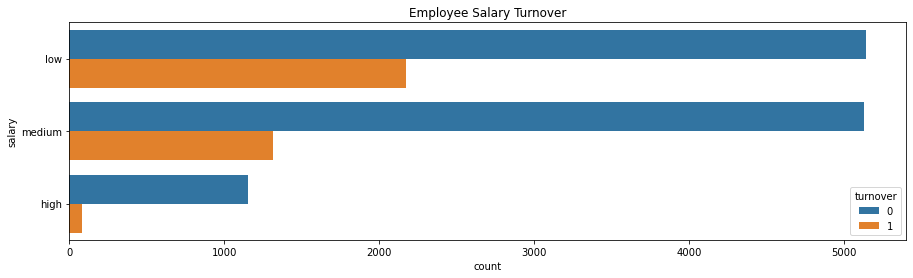

In [25]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="salary", hue='turnover', data=df).set_title('Employee Salary Turnover');

**NOTE:**  
Se por acaso você está um pouco consigo com **"O que representa a barra azul?"** e **"O que representa a barra laranja?"**. É muito simples, basta você dar uma olhadinha na **legenda (legend)** do gráfico que você vai ver:

 - **turnover:**
   - 0 = Azul
   - 1 = Laranja
 - Ou seja:
   - 0 = Azul = Quem permaneceu na empresa;
   - 1 = Laranja = Quem saiu/deixou a empresa.

**Análise:**  
- A maioria dos empregados que saíram tinha salário **baixo** ou **médio**.
 - Quase nenhum empregado com alto salário deixou a empresa.
 
**Questões:** 
 - Como é o ambiente de trabalho? Isso se difere por salário?
 - O que faz empregados com alto salário sairem da empresa.

## 15 - Verificando o turnover em relação departamento
Agora nós vamos analisar o turnover em relação a cada Departamento da empresa. Ou seja, para cada departamento, qual teve mais saída de funcionários.

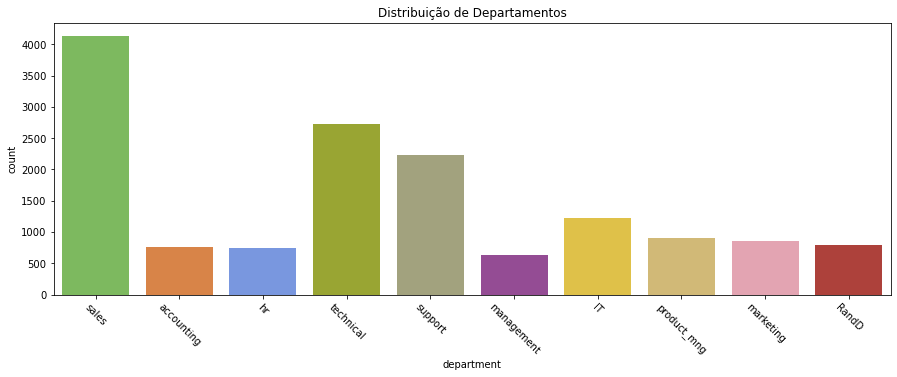

In [26]:
f, ax = plt.subplots(figsize=(15, 5)) # Configura o plot.

# Define uma lista de cores (RBG) para cada departamento.
color_types = [
  '#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0','#F8D030','#E0C068',
  '#EE99AC','#C03028','#F85888','#B8A038','#705898','#98D8D8','#7038F8'
]

plt.xticks(rotation=-45)

sns.countplot(x='department', data=df, palette=color_types).set_title('Distribuição de Departamentos');

**NOTE:**  
As barras acima mostram o número de funcionários para cada departamento. Você pode ver que o departamento **"sales"** é o que tem mais funcionários.

Agora nós vamos comparar (analisar) para cada departamento o nível de turnover:

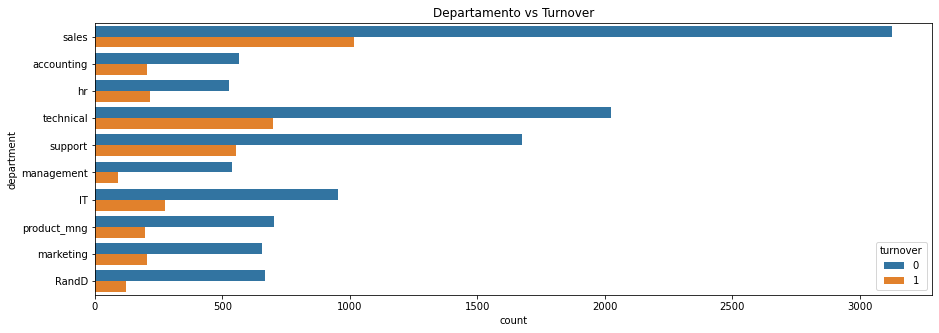

In [27]:
f, ax = plt.subplots(figsize=(15, 5)) # Configura o plot.

sns.countplot(y="department", hue='turnover', data=df).set_title('Departamento vs Turnover');

 - Os departamentos de vendas, técnico e suporte são top 3 departamentos com maior índice de turnover.
 - O departamento management tem o menor volume de turnover.

**Questões:** 
 - Será que examinar em profundidade os departamentos que tem maior índice de turnover e o menor pode nos revelar mais    informações importantes?
 - Qual o salário nestes departamentos?

## 16 - Verificando o turnover em relação ao número de projetos
Agora nós vamos analisar a relação de turnover com número de projetos:

[]

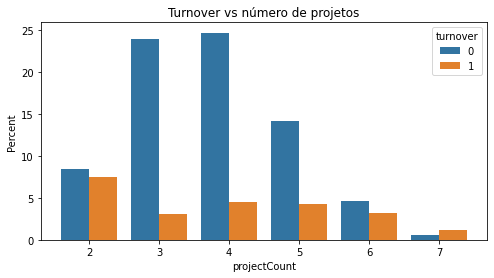

In [28]:
fig = plt.figure(figsize=(8,4),) # Configura o plot.

ax = sns.barplot(
  x="projectCount",
  y="projectCount",
  hue="turnover",
  data=df,
  estimator=lambda x: len(x) / len(df) * 100
)

ax.set(ylabel="Percent")
plt.title('Turnover vs número de projetos')
plt.plot()

 - Mais da metade dos empregados com **2,6 e 7 projetos** deixam a empresa.
 - A maioria dos empregados que permancem na empresa estão envolvidos de **3 à 5 projetos**.
 - Todos os empregados que estavam inseridos **7 projetos** deixaram a empresa.
 - Existe uma pequena **tendência de crescimento no índice de turnover** em relação à quantidade de projetos.
 
**Questões:**
 - Porque os empregados estão deixando a empresa em relação a quantidade de projetos ?
 - Será que faz sentido pensar que empregados envolvidos em 2 ou menos projetos estão desmotivados e por isso deixam a empresa?
 - Será que empregados envolvidos em mais que 6 projetos se sintam sobrecarregados e deixam a empresa?

## 17 - Verificando o turnover em relação a nota de avaliação

[]

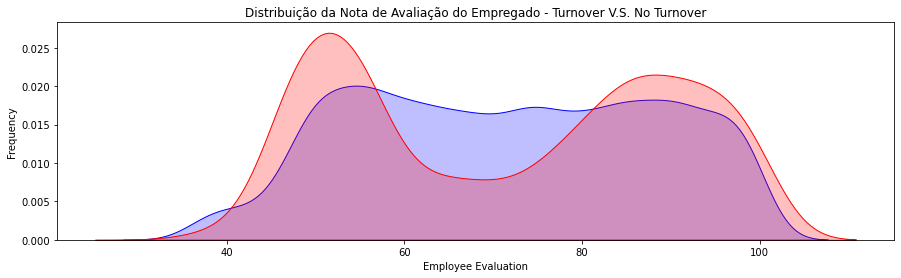

In [29]:
fig = plt.figure(figsize=(15,4),) # Configura o plot.

# Basicamente o que você precisa sabe aqui é que:
# - Estamos utilizando a função loc() para fazer tipo uma relação entre turnover = 0 e coluna "satisfaction".
# - Essa representação no gráfico vai ser com uma linha azul = b = blue.
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'evaluation'] , color='b',shade=True, label='no turnover')

# Basicamente o que você precisa sabe aqui é que:
# - Estamos utilizando a função loc() para fazer tipo uma relação entre turnover = 1 e coluna "satisfaction".
# - Essa representação no gráfico vai ser com uma linha vermelha = r = red.
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'evaluation'] , color='r',shade=True, label='turnover')

ax.set(xlabel='Employee Evaluation', ylabel='Frequency')
plt.title('Distribuição da Nota de Avaliação do Empregado - Turnover V.S. No Turnover')
plt.plot()

 - Temos uma distribuição bimodal para o conjunto que deixou a empresa.
 - Colaboradores com **baixa performance** tendem a deixar a empresa.
 - Colaboradores com **alta performance** tendem a deixar a empresa.
 - O **ponto ideal** para os funcionários que permaneceram está dentro da avaliação de 60 à 80.

## 18 - Verificando o turnover em relação a satisfação do empregado

[]

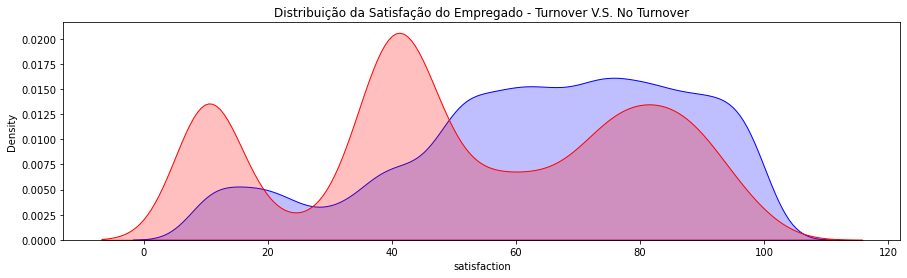

In [30]:
fig = plt.figure(figsize=(15,4)) # Configura o plot.

# Basicamente o que você precisa sabe aqui é que:
# - Estamos utilizando a função loc() para fazer tipo uma relação entre turnover = 0 e coluna "satisfaction".
# - Essa representação no gráfico vai ser com uma linha azul = b = blue.
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'satisfaction'] , color='b',shade=True, label='no turnover')

# Basicamente o que você precisa sabe aqui é que:
# - Estamos utilizando a função loc() para fazer tipo uma relação entre turnover = 1 e coluna "satisfaction".
# - Essa representação no gráfico vai ser com uma linha vermelha = r = red.
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'satisfaction'] , color='r',shade=True, label='turnover')

plt.title('Distribuição da Satisfação do Empregado - Turnover V.S. No Turnover')
plt.plot()

 - Empregados com o nível de satisfação em 20 ou menos tendem a deixar a empresa.
 - Empregados com o nível de satisfação em até 50 tem maior probabilidade de deixar a empresa.

## 19 - Verificando a relação entre número de projetos e a nota de avaliação do empregado

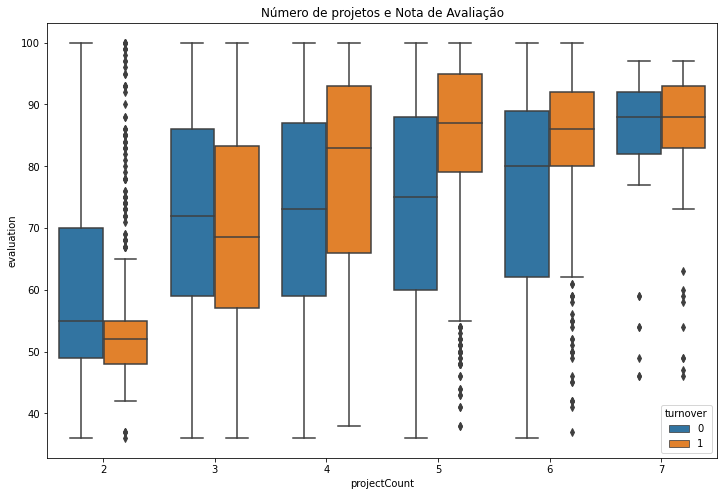

In [31]:
fig = plt.figure(figsize=(12, 8)) # Configura o plot.

import seaborn as sns
sns.boxplot(x="projectCount", y="evaluation", hue="turnover", data=df)
plt.title("Número de projetos e Nota de Avaliação")
plt.show()

**Resumo:** 
- Há um **aumento na avaliação** para os funcionários que realizaram mais projetos dentro do grupo de quem deixou a empresa. 
- Para o grupo de pessoas que permaneceram na empresa, os empregados tiveram uma **pontuação de avaliação consistente**, apesar do aumento nas contagens de projetos.
- Empregados que permaneceram na empresa tiveram uma **avaliação média em torno de 70%**, mesmo com o número de projetos crescendo.
- Esta relação muda drasticamente entre os empregados que deixaram a empresa. A partir de 3 projetos, as **médias de avaliação aumentam consideravelmente**.
- Empregados que tinham **dois projetos e uma péssima avaliação** saíram.
- Empregados com **mais de 3 projetos e avaliações altas** deixaram a empresa.

**Questões:**
  - Por que será que os funcionários que saíram tiveram em média uma avaliação superior aos funcionários que não saíram, mesmo com um aumento no número de projetos?
  - Os funcionários com avaliações mais baixas não deveriam ter tendência a sair mais da empresa?

## 20 - Verificando a relação entre a satisfação do empregado e a sua avaliação

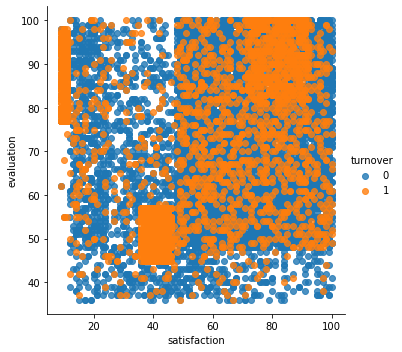

In [32]:
sns.lmplot(
  x = 'satisfaction', 
  y = 'evaluation', 
  data = df,
  fit_reg = False,
  hue='turnover'
)

**Resumo:**: Temos aqui 3 grupos distintos de empregados.
 
**Cluster 1 (Empregados insatisfeitos e trabalhadores):** A satisfação foi inferior a 20 e as avaliações foram superiores a 75. 
- O que pode ser uma boa indicação de que os funcionários que deixaram a empresa eram bons trabalhadores, mas se sentiam péssimos no trabalho.

Questões: 
 - Qual poderia ser o motivo de se sentir tão mal quando você é altamente avaliado? 
 - Será que está trabalhando muito? 
 - Esse cluster poderia significar funcionários que estão "sobrecarregados"? 
 
**Cluster 2 (Empregados ruins e insatisfeitos):** Satisfação entre 35 à 50 e as suas avaliações abaixo de ~ 58. 

Questões:
- Isso pode ser visto como funcionários que foram mal avaliados e se sentiram mal no trabalho.
- Podemos chamar esse grupo de baixo desempenho?

**Cluster 3 (Empregados satisfeitos e trabalhadores):** Satisfação entre 75 à 90 e avaliações superiores a 80. 
- O que poderia significar que os funcionários neste grupo eram "ideais". 
- Eles amavam seu trabalho e eram altamente avaliados por seu desempenho.

**Questões:** 
- Este grupo pode representar os empregados que deixaram a empresa porque encontraram outra oportunidade de trabalho?
- Poderiamos ter mais do que 3 clusters?

## 21 - Computando os clusters

#### Importando a biblioteca Scikit-learn

In [33]:
from sklearn.cluster import KMeans

#### Inicializando os clusters

In [34]:
kmeans = KMeans(n_clusters=3,random_state=2) # KMeans instance.

#### Definindo o conjunto de dados
Aqui nós vamos definir que vamos trabalhar, apenas, com os dados de quem saiu da empresa:

In [35]:
df_turnover = df[df.turnover==1][["satisfaction","evaluation"]]

#### Computando os clusters

In [36]:
kmeans.fit(df_turnover) # Treina o modelo.

KMeans(n_clusters=3, random_state=2)

In [37]:
kmeans_colors = ['green' if c == 0 else 'red' if c == 1 else 'blue' for c in kmeans.labels_]

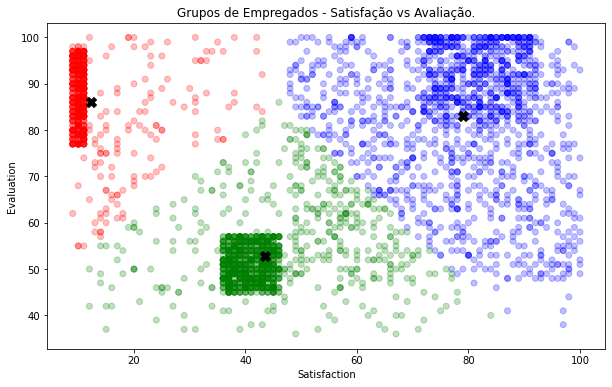

In [38]:
fig = plt.figure(figsize=(10, 6))

plt.scatter(
  x="satisfaction",
  y="evaluation",
  data=df_turnover,
  alpha=0.25,
  color = kmeans_colors
)

plt.xlabel("Satisfaction")
plt.ylabel("Evaluation")

plt.scatter(
  x=kmeans.cluster_centers_[:,0],
  y=kmeans.cluster_centers_[:,1],
  color="black",
  marker="X",s=100
)

plt.title("Grupos de Empregados - Satisfação vs Avaliação.")
plt.show()

## K-Means Grupos
***
**Cluster 0 (Verde):** Empregados trabalhadores e satisfeitos.

**Cluster 1 (Vermelho):** Empregados ruins e insatisfeitos. 

**Cluster 2 (Azul):** Empregados trabalhadores e tristes.

## 22 - Verificando a relação entre o tempo de empresa e o turnover
Agora nós vamos fazer uma análise que vai verificar:

> **Se os funcionários que mais sai da empresa são os que tem *mais* ou *menos* tempo na empresa?**

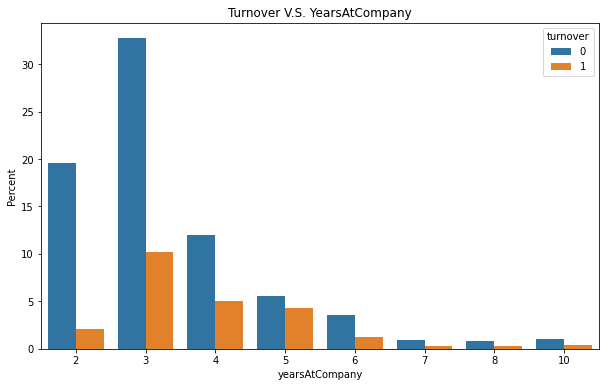

In [39]:
fig = plt.figure(figsize=(10, 6))

ax = sns.barplot(
  x="yearsAtCompany",
  y="yearsAtCompany",
  hue="turnover",
  data=df,
  estimator=lambda x: len(x) / len(df) * 100
)
ax.set(ylabel="Percent")
plt.title("Turnover V.S. YearsAtCompany")
plt.show()

##  Turnover V.S. YearsAtCompany 
***
**Resumo:** Vamos ver mais alguns pontos para entender o porque os empregados deixam a empresa.
 - Empregados com **4 e 5 anos de casa** deixaram a empresa.
 - Empregados acima de **5 anos de casa** devem ser examinados.
 
**Questões:**
  - Por que os Empregados estão saindo principalmente na faixa de 3-5 anos?
  - Quem são esses Empregados que saíram?

## 23 - Carregando os artefatos no Data Lake
Ok, agora depois de todas essas análise nós precisamos salvar tudo isso no nosso Data Lake.

Vamos começar importando a biblioteca **Joblib** que tem conjunto de ferramentas para fornecer pipelining leve em Python:

In [40]:
import joblib

#### Persistindo o objeto cluster para o disco:

In [41]:
joblib.dump(kmeans, "cluster.joblib")

['cluster.joblib']

#### Transferindo o arquivo para o Data Lake:

In [42]:
client.fput_object(
  "curated",
  "cluster.joblib",
  "cluster.joblib"
)

# Sweetviz
Agora e não menos importante nós vamos ver como utilizar a biblioteca **Sweetviz** que nós dar um *overview* sobre os dados em que precisamos fazer análises:

In [43]:
pip install sweetviz

Note: you may need to restart the kernel to use updated packages.


In [44]:
import sweetviz as sv

my_report = sv.analyze(df,"turnover")
my_report.show_html()

                                             |                                                           | [  …

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
